In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
url = 'https://raw.githubusercontent.com/analuizapl/spotify/main/playlist.csv'

dados = pd.read_csv(url, sep=';', on_bad_lines='skip')

In [3]:
dados.head(2)

,Duration(ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track_Name_Artist_Name,Artists,id
0,173249,51,0.617,0.761,2,-5.392,0,0.0591,0.135,0.000000,0.2630,0.528,160.080,4,Trash - Little Mix,Little Mix,2Tb4Us0GhAuCpEsqOdTmmy
1,136614,62,0.764,0.672,7,-5.947,0,0.0293,0.072,0.000003,0.0806,0.789,129.049,4,Good Ones - Charli XCX,Charli XCX,6PZpNMstpIiRenGK5UyG5D


In [4]:
dados = dados.drop(["Key", "Mode","Time Signature"], axis=1)
dados.head(2)

,Duration(ms),Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track_Name_Artist_Name,Artists,id
0,173249,51,0.617,0.761,-5.392,0.0591,0.135,0.000000,0.2630,0.528,160.080,Trash - Little Mix,Little Mix,2Tb4Us0GhAuCpEsqOdTmmy
1,136614,62,0.764,0.672,-5.947,0.0293,0.072,0.000003,0.0806,0.789,129.049,Good Ones - Charli XCX,Charli XCX,6PZpNMstpIiRenGK5UyG5D


In [5]:
dados.shape

(2439, 14)

In [6]:
#NaN values
dados = dados.dropna() 
dados.isna().sum()

Duration(ms)              0
Popularity                0
Danceability              0
Energy                    0
Loudness                  0
Speechiness               0
Acousticness              0
Instrumentalness          0
Liveness                  0
Valence                   0
Tempo                     0
Track_Name_Artist_Name    0
Artists                   0
id                        0
dtype: int64

In [7]:
import plotly.express as px

In [8]:
fig = px.imshow(dados.corr(), text_auto=True)
fig.show()

In [9]:
dados['Artists'].value_counts()

BTS                            161
Twenty One Pilots               65
One Direction                   63
Lana Del Rey                    61
TWICE                           54
                              ... 
Joel Corry,MNEK                  1
Tiësto,Jonas Blue,Rita Ora       1
Galantis,OneRepublic             1
Curtis Waters,Harm Franklin      1
TAEYANG,Jimin                    1
Name: Artists, Length: 924, dtype: int64

In [10]:
display(dados['Track_Name_Artist_Name'].value_counts())

Trash - Little Mix                                                  1
Wherever You Are - 5 Seconds of Summer                              1
Stone Cold - Demi Lovato                                            1
Two Pieces - Demi Lovato                                            1
Nightingale - Demi Lovato                                           1
                                                                   ..
Uh Huh - Julia Michaels                                             1
Say It (feat. Tove Lo) [Illenium Remix] - Flume,Tove Lo,ILLENIUM    1
Diamonds - Jauz,Kiiara                                              1
I Keep Ticking On - The Harmaleighs                                 1
VIBE (feat. Jimin of BTS) - TAEYANG,Jimin                           1
Name: Track_Name_Artist_Name, Length: 2437, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['Artists']]).toarray()
dados2 = dados.drop('Artists', axis=1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['Artists']))], axis=1)
dados_musicas_dummies

,Duration(ms),Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,...,Artists_morgxn,Artists_mxmtoon,"Artists_nothing,nowhere.",Artists_oomiee,Artists_phem,Artists_poutyface,Artists_shy martin,Artists_stef,Artists_tiLLie,"Artists_waykap,WAT3RS"
0,173249.0,51.0,0.617,0.761,-5.392,0.0591,0.135000,0.000000,0.2630,0.528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,136614.0,62.0,0.764,0.672,-5.947,0.0293,0.072000,0.000003,0.0806,0.789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,207151.0,45.0,0.747,0.819,-3.920,0.0410,0.034700,0.000000,0.2970,0.488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,200786.0,41.0,0.680,0.968,-0.696,0.0543,0.032700,0.000000,0.1880,0.869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,199600.0,40.0,0.682,0.908,-2.882,0.1510,0.008820,0.000005,0.2230,0.632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,250763.0,67.0,0.590,0.849,-4.691,0.0792,0.030500,0.000000,0.1100,0.178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2435,213750.0,52.0,0.635,0.859,-3.836,0.0414,0.000109,0.010300,0.4110,0.631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2436,111333.0,41.0,0.587,0.882,-3.794,0.0487,0.038500,0.000000,0.3200,0.707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2437,180760.0,40.0,0.950,0.432,-5.457,0.1090,0.024900,0.000014,0.1550,0.769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
SEED = 1224
np.random.seed(1224)

In [14]:
#NaN values

#dados_musicas_dummies = dados_musicas_dummies.dropna() 
dados_musicas_dummies.isnull().sum()

Duration(ms)             2
Popularity               2
Danceability             2
Energy                   2
Loudness                 2
                        ..
Artists_poutyface        2
Artists_shy martin       2
Artists_stef             2
Artists_tiLLie           2
Artists_waykap,WAT3RS    2
Length: 937, dtype: int64

In [15]:
dados_musicas_dummies = dados_musicas_dummies.dropna(subset=['Duration(ms)'])
dados_musicas_dummies = dados_musicas_dummies.fillna(0)

In [16]:
dados.shape


(2437, 14)

In [17]:
dados_musicas_dummies.shape

(2437, 937)

In [18]:
dados_musicas_dummies = dados_musicas_dummies.reset_index()

In [19]:
display(dados_musicas_dummies)

,index,Duration(ms),Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,...,Artists_morgxn,Artists_mxmtoon,"Artists_nothing,nowhere.",Artists_oomiee,Artists_phem,Artists_poutyface,Artists_shy martin,Artists_stef,Artists_tiLLie,"Artists_waykap,WAT3RS"
0,0,173249.0,51.0,0.617,0.761,-5.392,0.0591,0.135000,0.000000,0.2630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,136614.0,62.0,0.764,0.672,-5.947,0.0293,0.072000,0.000003,0.0806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,207151.0,45.0,0.747,0.819,-3.920,0.0410,0.034700,0.000000,0.2970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,200786.0,41.0,0.680,0.968,-0.696,0.0543,0.032700,0.000000,0.1880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,199600.0,40.0,0.682,0.908,-2.882,0.1510,0.008820,0.000005,0.2230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,2434,250763.0,67.0,0.590,0.849,-4.691,0.0792,0.030500,0.000000,0.1100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2433,2435,213750.0,52.0,0.635,0.859,-3.836,0.0414,0.000109,0.010300,0.4110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2434,2436,111333.0,41.0,0.587,0.882,-3.794,0.0487,0.038500,0.000000,0.3200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2435,2437,180760.0,40.0,0.950,0.432,-5.457,0.1090,0.024900,0.000014,0.1550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#PCA Reduzir a dimensão de um conjunto de dados
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])


music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['Track_Name_Artist_Name','id'], axis=1))
projection_m = pd.DataFrame(data=music_embedding_pca)

In [21]:
pca_pipeline[1].n_components_

646

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans_pca_pipeline = KMeans(n_clusters=25, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

In [24]:
projection_m['Artists'] = dados['Artists']
projection_m['Track_Name_Artist_Name'] = dados['Track_Name_Artist_Name']

In [25]:
projection_m

,0,1,2,3,4,5,6,7,8,9,...,639,640,641,642,643,644,645,cluster_pca,Artists,Track_Name_Artist_Name
0,-0.846314,-0.202626,0.841945,0.001633,-0.397507,0.632405,-0.063876,-1.400390,-0.595630,0.289450,...,2.012197e-14,1.515003e-15,-8.725991e-16,1.402047e-14,-9.352335e-15,-6.416012e-15,5.888706e-15,9,Little Mix,Trash - Little Mix
1,-0.814361,-1.928355,0.146166,-0.253243,-0.195267,0.463604,-0.072753,-0.339264,-1.038414,0.307676,...,3.148316e-13,-4.337085e-13,-4.810644e-13,6.329395e-13,-1.125642e-12,4.995657e-13,-8.199969e-13,9,Charli XCX,Good Ones - Charli XCX
2,-1.756483,-0.860628,1.827660,-1.076162,0.735537,0.201265,1.306846,-0.642260,-0.620563,0.382309,...,-1.346158e-13,-1.403118e-14,4.682056e-14,6.500596e-14,5.215386e-14,2.248415e-15,-1.788025e-15,9,SUPER JUNIOR-D&E,‘Bout you - SUPER JUNIOR-D&E
3,-3.293550,-0.937795,1.812919,-1.101225,0.588475,-0.170824,0.815610,-0.334903,-0.263655,1.092980,...,-1.356544e-13,-1.141338e-14,4.773064e-14,6.377468e-14,5.247372e-14,3.126367e-15,-1.275775e-15,9,SUPER JUNIOR-D&E,B.A.D - SUPER JUNIOR-D&E
4,-2.517553,-0.552579,2.027628,-0.410356,0.395767,0.356171,0.753933,-0.104625,-0.589711,0.550774,...,-1.344338e-13,-1.229133e-14,4.636820e-14,6.483632e-14,5.221141e-14,1.916506e-15,-1.118854e-15,9,SUPER JUNIOR-D&E,No Love - SUPER JUNIOR-D&E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0.281087,1.860840,-2.072273,-1.225563,-0.133240,-0.644005,0.272547,1.529888,0.923458,-1.084591,...,3.253430e-12,4.858075e-13,-8.266900e-13,-2.842370e-12,-5.058885e-12,6.666275e-12,3.796620e-12,9,First to Eleven,Take on Me - First to Eleven
2433,-1.014056,1.510117,-2.334078,-0.498016,0.436538,-0.433934,1.510064,0.809922,1.427169,-0.665331,...,3.253376e-12,4.858825e-13,-8.267609e-13,-2.842232e-12,-5.059169e-12,6.666301e-12,3.796673e-12,22,First to Eleven,I Love Rock 'N Roll - First to Eleven
2434,-1.937221,0.485077,-3.440517,2.425620,-0.014146,-1.721707,1.465937,-1.852234,-0.750284,1.565339,...,1.966787e-01,1.182988e+00,-1.400212e+00,-1.606458e+00,-4.145303e-01,2.327006e+00,5.716998e-01,22,"Ed Sheeran,Bring Me The Horizon",Bad Habits (feat. Bring Me The Horizon) - Ed S...
2435,0.052252,-1.842549,-1.049861,1.021656,0.269445,-0.370703,0.086894,0.127701,0.725804,-0.679631,...,2.783752e-16,-1.391876e-15,5.995773e-16,-1.584597e-15,1.306222e-15,-1.761258e-15,2.569617e-16,22,Rain Paris,S&M - Rain Paris


In [26]:
import plotly.express as px

In [27]:
fig = px.scatter(projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1, 'Track_Name_Artist_Name'])
fig.show()

In [28]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7010546821786925

In [29]:
pca_pipeline[1].explained_variance_.sum()

655.7552108123803

Recomendação de música

In [30]:
nome_musica = 'Talk that Talk - TWICE'

In [31]:
from pandas.core.dtypes.cast import maybe_upcast
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_m[projection_m['Track_Name_Artist_Name']== nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'Track_Name_Artist_Name']]
x_musica = list(projection_m[projection_m['Track_Name_Artist_Name']== nome_musica][0])[0]
y_musica = list(projection_m[projection_m['Track_Name_Artist_Name']== nome_musica][1])[0]

#distâncias euclidianas
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias']= distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(15)
recomendada

,0,1,Track_Name_Artist_Name,id,distancias
2320,-1.054082,-0.043178,Talk that Talk - TWICE,0RDqNCRBGrSegk16Avfzuq,0.000000
2116,-1.057979,-0.129808,"Combatchy (feat. MC Rebecca) - Anitta,Lexa,Luí...",2bPtwnrpFNEe8N7Q85kLHw,0.086718
2162,-1.034555,-0.162284,And So It Went (feat. Tom Morello) - The Prett...,03Szk0skbXqllHkNCVZI9p,0.120696
2385,-0.929637,0.008928,Bicycle - RM,5zvLKLuTQvN8BzdQtOSBd3,0.134914
1341,-0.961225,-0.161880,Whistle - Dreamcatcher,1L0Cy0zcLydO5AdBjkyK1S,0.150707
2093,-1.109947,-0.193761,Sleeping with the Enemy - Butcher Babies,4vzlN6pMehztFUIdNlei1m,0.160612
2079,-1.077514,-0.211250,A Night to Remember - High School Musical Cast...,3LmSi7QFblPIE43B0pnmti,0.169698
2041,-1.037837,0.144316,I Wanna Know You - Hannah Montana,6ftcAmQPmGbk7Gkr5MJe4T,0.188196
2287,-0.865342,0.019576,Bad Decisions - RedHook,2uJvuMZVAfnWa3lTTxJW9q,0.198899
2239,-0.936009,-0.233316,E.T. - First to Eleven,7Fm7hIScEhoUTRjLdvguXi,0.223816


In [32]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 12.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [33]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [34]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = 'CLIENTID',
        client_secret = 'CLIENTSECRET')

In [35]:
client_credentials_manager = SpotifyClientCredentials(client_id = 'CLIENTID',client_secret = 'CLIENTSECRET')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [36]:
dados.head(1)

,Duration(ms),Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track_Name_Artist_Name,Artists,id,cluster_pca
0,173249,51,0.617,0.761,-5.392,0.0591,0.135,0.0,0.263,0.528,160.08,Trash - Little Mix,Little Mix,2Tb4Us0GhAuCpEsqOdTmmy,9


In [37]:
import matplotlib.pyplot as plt
from skimage import io
import textwrap

def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_m[projection_m['Track_Name_Artist_Name']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'Track_Name_Artist_Name']]
  x_musica = list(projection_m[projection_m['Track_Name_Artist_Name']== nome_musica][0])[0]
  y_musica = list(projection_m[projection_m['Track_Name_Artist_Name']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(15)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      wrapper = textwrap.TextWrapper(width=50)
      shortened = textwrap.shorten(text=track["name"], width=100)
      shortened_wrapped = wrapper.fill(text=shortened)
      name.append(shortened_wrapped)

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()

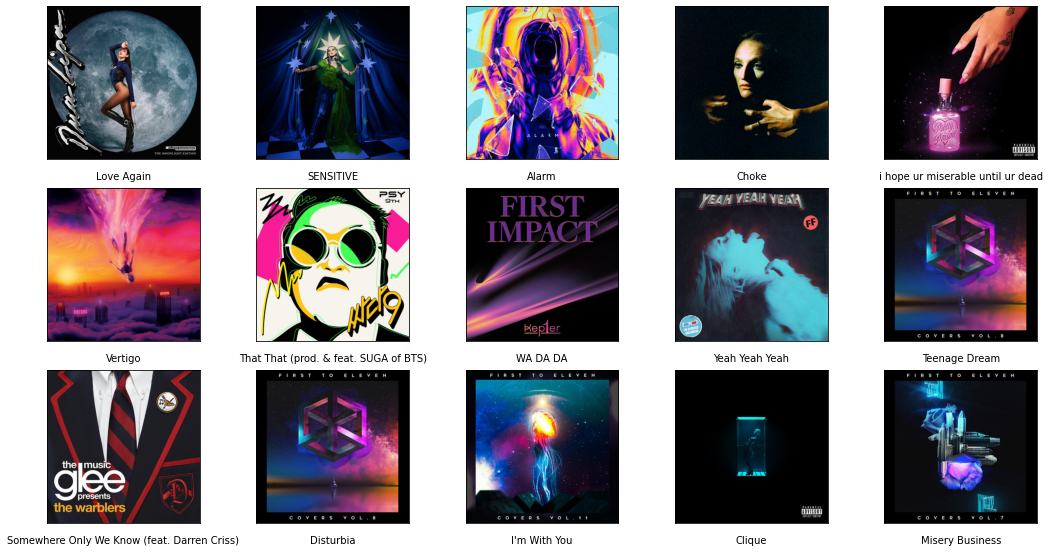

In [38]:
recomendador('Love Again - Dua Lipa')